# Dimensionality Reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

### Feature names

In [2]:
with open('../data/feature_names.txt') as f:
    feature_names = [ line.strip() for line in f.readlines() ]

In [3]:
feature_names[:3]

['YEAR_2014', 'YEAR_2015', 'YEAR_2016']

In [4]:
len(feature_names)

888

### X and Y

In [5]:
X_train = np.load('../data/X_train.npy')

In [6]:
X_train.shape

(12648, 888)

In [7]:
X_test = np.load('../data/X_test.npy')

In [8]:
X_test.shape

(3163, 888)

In [9]:
y_train = np.load('../data/y_train.npy')

In [10]:
y_train.shape

(12648,)

In [11]:
y_test = np.load('../data/y_test.npy')

In [12]:
y_test.shape

(3163,)

In [13]:
X = []
X.extend(X_train)
X.extend(X_test)

In [14]:
y = []
y.extend(y_train)
y.extend(y_test)

In [15]:
len(X), len(y)

(15811, 15811)

## PCA

In [16]:
from sklearn.decomposition import PCA

def get_pca(vectors):

    # PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(vectors)
    print('PCA explained variance ratio:', pca.explained_variance_ratio_, 'Total:', sum(pca.explained_variance_ratio_))
    return principal_components

In [17]:
vectors_pca = get_pca(X)

PCA explained variance ratio: [0.78160831 0.21839169] Total: 0.999999999999392


In [18]:
vectors_pca

array([[-55246802.37732714,  -3034547.35844721],
       [-55246926.49377894,  -3034615.14559705],
       [-55246926.49378279,  -3034615.14558605],
       ...,
       [-55246802.37732805,  -3034547.35838379],
       [-55246802.37733474,  -3034547.35836157],
       [-55246914.08213554,  -3034608.36687637]])

In [19]:
vectors_pca[0]

array([-55246802.37732714,  -3034547.35844721])

In [20]:
from matplotlib.lines import Line2D

def get_colors(grades, num_colors):
    
    colors = []
    for grade in grades:
        if num_colors == 2:
            if grade:
                colors.append('g')
            else:
                colors.append('r')
        elif num_colors == 5:
            if grade == 'P':
                colors.append('b')
            elif grade == 'F':
                colors.append('r')
            elif grade == 'F0':
                colors.append('g')
            elif grade == '0':
                colors.append('o')
            else:
                colors.append('k')
        else:
            colors.append('b')
    return colors

def plot_vectors(low_dim_vectors, grades, num_colors=2, figsize=(8, 8), figure_name=''):
    
    # colors
    colors = get_colors(grades, num_colors)
    
    # X and Y
    x = [ v[0] for v in low_dim_vectors ]
    y = [ v[1] for v in low_dim_vectors ]

    # Scatter plot
    plt.figure(figsize=figsize, dpi=100)
    ax = plt.axes()
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_locator(plt.NullLocator())
    plt.scatter(x, y, color=get_colors(grades, num_colors), alpha=0.25)
    
    if num_colors == 2:
        legend_colors = [
            ('P: Pass', 'green'),
            ('F: Fail', 'red'),
        ]
    elif num_colors == 5:
        legend_colors = [
            ('P: Pass', 'blue'),
            ('F: Fail', 'red'),
            ('F0', 'green'),
            ('0', 'orange'),
        ]
    else:
        legend_colors = [
            ('Any', 'blue'),
        ]
    legend_elements = []
    for l in legend_colors:
        label, color = l
        legend_elements.append(
            Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
        )
    ax.legend(handles=legend_elements, loc='upper right')

    plt.savefig('../figures/dimensionality_reduction_{}.png'.format(figure_name), bbox_inches="tight")
    

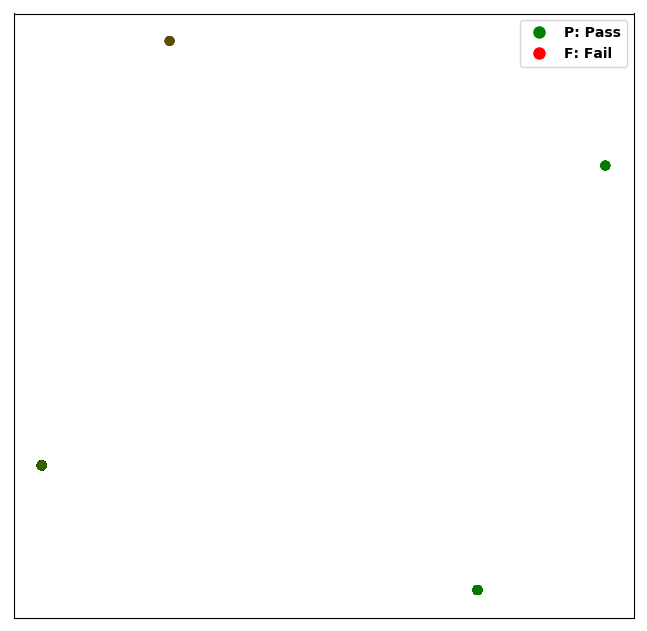

In [21]:
plot_vectors(vectors_pca, y, figure_name='PCA')

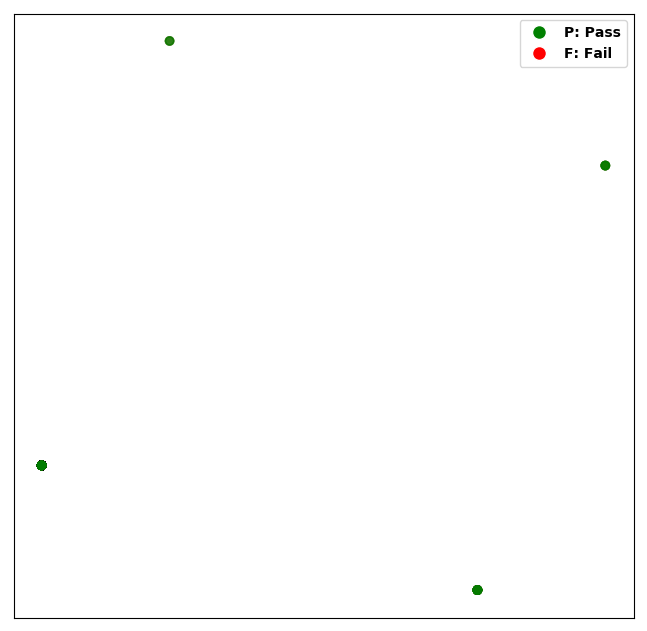

In [22]:
threshold = 5000
plot_vectors(vectors_pca[:threshold], y[:threshold], figure_name='PCA_5K')

## UMAP

In [23]:
import umap

def get_umap(vectors):
    return umap.UMAP().fit_transform(vectors)

In [24]:
vectors_umap = get_umap(X)

/usr/local/lib/python3.5/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


In [25]:
vectors_umap[0]

array([5.9988337, 3.8233507], dtype=float32)

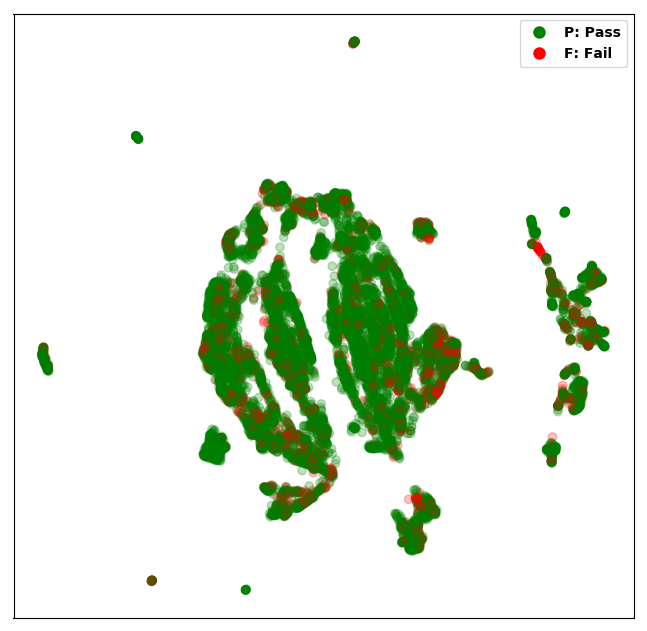

In [26]:
plot_vectors(vectors_umap, y, figure_name='UMAP')

## t-SNE

In [27]:
from sklearn.manifold import TSNE
    
def get_tsne(vectors):
    
    # tSNE
    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000)
    low_dim_embs = tsne.fit_transform(vectors)
    return low_dim_embs

In [28]:
vectors_tsne = get_tsne(X)

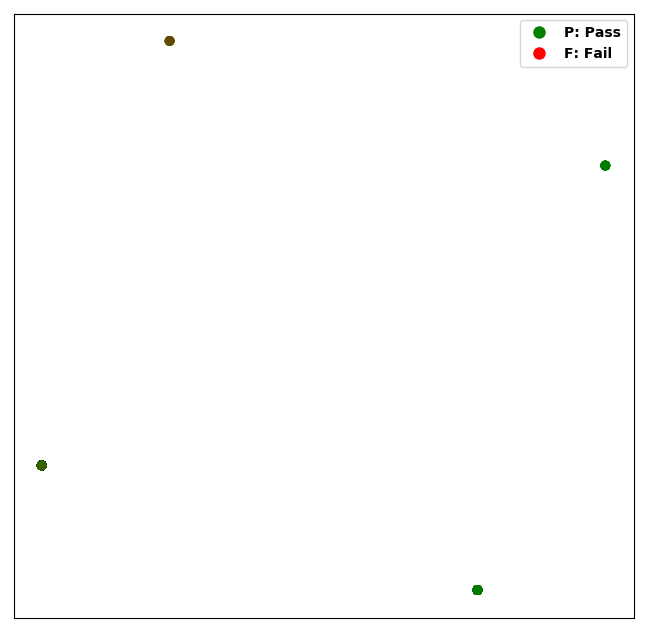

In [29]:
plot_vectors(vectors_tsne, y, figure_name='tSNE')

## Utils

In [30]:
x = np.array([1, 2, 3, 4, 5])

In [31]:
r = np.array([2, 3, 4, 5, 6])

In [32]:
x, r

(array([1, 2, 3, 4, 5]), array([2, 3, 4, 5, 6]))

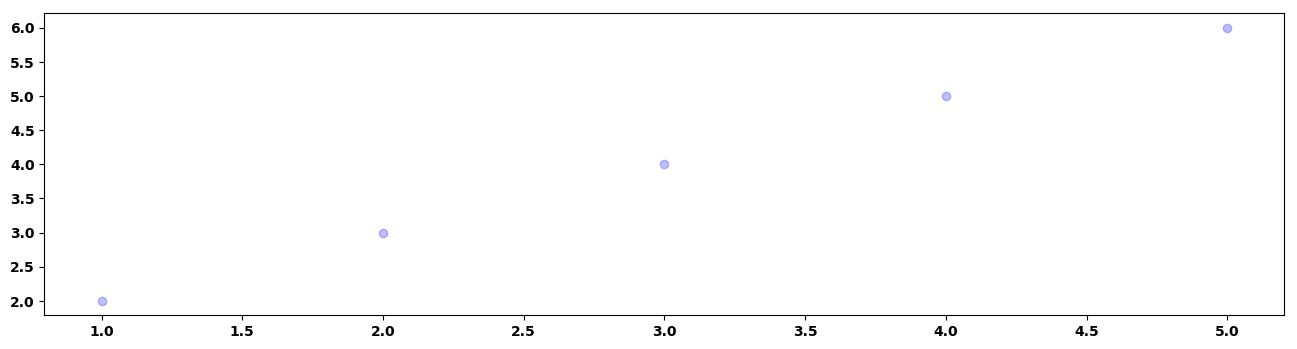

In [33]:
plt.figure(figsize=(16, 4), dpi=100)
plt.scatter(x, r, color='b', alpha=0.25)

In [34]:
a = np.array([
    np.array([1, 2]),
    np.array([2, 3]),
    np.array([3, 4]),
    np.array([4, 5]),
    np.array([5, 6]),
    np.array([6, 7]),
])

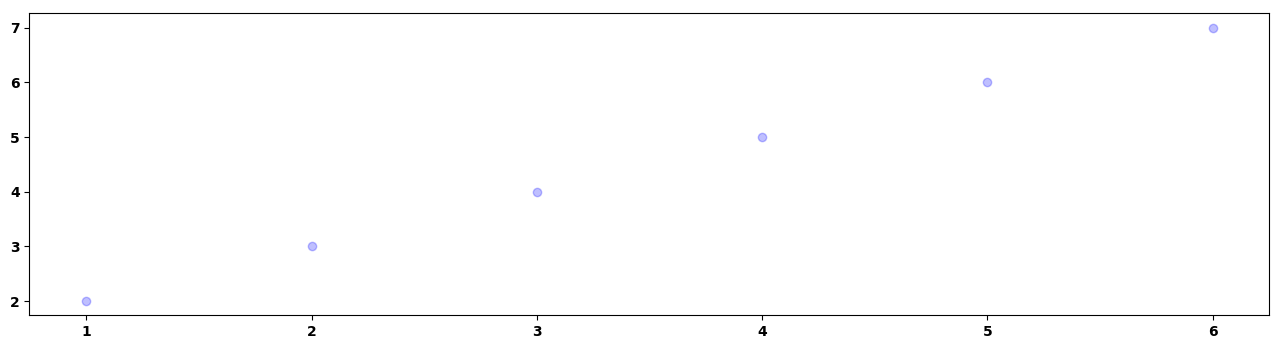

In [35]:
x = [ p[0] for p in a]
r = [ p[1] for p in a]
plt.figure(figsize=(16, 4), dpi=100)
plt.scatter(x, r, color='b', alpha=0.25)